# 単層NN（パーセプトロン）

## データの読み込み

訓練データを読み込む．以下により，<code>tr.x</code>がデータの2次元座標を記録した $2\times n$ 行列，<code>tr.t</code>がデータのクラス番号（1 or 2）を記録した $1\times n$ 行列となる．ここで $n$ は訓練データ数．

In [2]:
tr = load('bin-gm-uniform-train.mat');

訓練データをプロットする．クラス1のデータは赤の○，クラス2のデータは青の×で表示される．

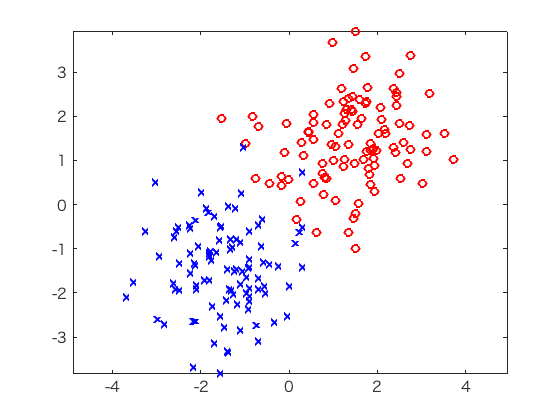

In [3]:
idx1 = (tr.t == 1);
idx2 = (tr.t == 2);
plot(tr.x(1,idx1),tr.x(2,idx1),'ro', ...
    tr.x(1,idx2),tr.x(2,idx2),'bx')
axis equal

## 単層NN分類器

### 教師信号の準備

In [4]:
t = ones(size(tr.t)); % 全て 1 の tr.t と同じサイズの行列を作成
t(tr.t==2) = -1; % クラス 2 の部分だけを -1 に設定

### 単層NNの作成

In [5]:
net = network(1,1,true,true,0,true); % 単層NNの作成
net = configure(net,tr.x,t); % 入出力データに合わせたサイズに設定．
net.layers{1}.transferFcn = 'tansig'; % 活性化関数を hyperbolic tangent へ

NNの構造や一部の設定は，<code>view(net)</code>を実行することにより確認できる．すると，ネットワークの構造を表す図がポップアップウィンドウに表示され，

- 2次元の入力を一つ受け取ること，
- 入力ノードおよびバイアスノードと繋がった層が1つあり，その活性化関数が hyperbolic tangent であること，
- 1次元の出力をすること，

などを見て取ることが出来る．

### 単層NNの初期化

NNの学習を行う前に，重みを適当に初期化しなければならない．以下で，初期化の仕方を設定する．（<code>rands</code>は，区間$[-1,1]$の一様乱数．）

In [6]:
net.initFcn = 'initlay'; % 各層へ初期化を任せる
net.layers{1}.initFcn = 'initwb'; % 各重みに初期化を任せる
net.inputWeights{1}.initFcn = 'rands'; % 入力からの重みを rands で設定
net.biases{1}.initFcn = 'rands'; % バイアスからの重みを rands で設定

上記の設定に従い，重みの初期化を行い，どのような関数を表すかを表示してみる．

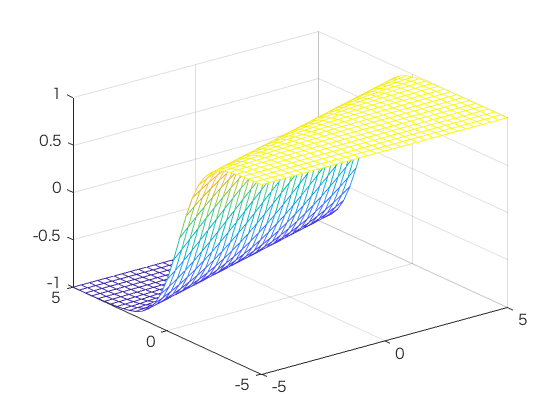

In [8]:
net = init(net); % 初期化の実行
[X,Y] = ndgrid(linspace(-5,5,31)); % プロットするための格子点の座標を生成
V = sim(net,[X(:),Y(:)]'); % net の出力を計算
mesh(X,Y,reshape(V,size(X))); % メッシュプロットの作成

もう一度，初期化と表示を行う．

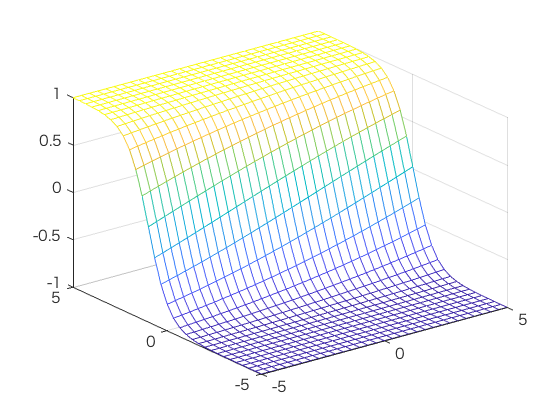

In [9]:
net = init(net); % 初期化の実行
V = sim(net,[X(:),Y(:)]'); % net の出力を計算
mesh(X,Y,reshape(V,size(X))); % メッシュプロットの作成

ランダムに初期化されているので，その度に異なる結果が得られる．

### 学習

学習を行うために，学習手法と，どのような性能評価を基準に学習するかを設定する．

In [10]:
net.trainFcn = 'trainscg'; % 誤差逆伝播法のある改良版
net.performFcn = 'mse'; % 平均二乗誤差を基準とする

学習は，関数<code>train</code>で行える．先ず，デフォルトの設定で実行してみる．

In [11]:
net = train(net,tr.x,t);

関数 <code>train</code> の実行中には，ウィンドウが現れ，NNの構造や，進行状況が表示される．
この例では，学習は一瞬で終わり，82回のバッチ学習で終了したこと，終了時の平均二乗誤差が 0.04 であること，終了は，勾配が基準値を下回ったためであることなどが分かる．

次に，学習後の単層NNが表す関数を，訓練データと共に表示する．

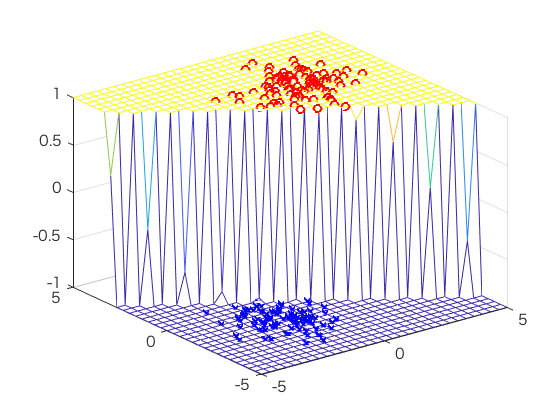

In [13]:
V = sim(net,[X(:),Y(:)]');
mesh(X,Y,reshape(V,size(X)));
hold on
plot3(tr.x(1,idx1),tr.x(2,idx1),t(idx1),'or'); % クラス1のデータをプロット
plot3(tr.x(1,idx2),tr.x(2,idx2),t(idx2),'xb'); % クラス2のデータをプロット
hold off

上の図より，概ね訓練データに合致する関数が学習できていることが分かる．訓練データに対する正解率を計算してみる．

In [16]:
v = sim(net,tr.x); % 訓練データに対する単層NNの出力を計算
label = ones(size(tr.t)); % 正解ラベルと同じサイズの全て1の行列を作成
label(v<0) = 2; % 出力が負の部分は，クラス2に分類されたので 2 へ設定
sum(tr.t == label)/numel(tr.t) % クラスが一致している割合


ans =

    0.9900



つまり，99% が一致している．ちなみに，このデータは200サンプル含まれているので2つの謝りがあった事になる．テストデータ（1000サンプル）も用意されているので，それに対する正解率も計算する．

In [18]:
te = load('bin-gm-uniform-test.mat'); % テストデータを読み込み
v = sim(net,te.x); % テストデータに対する単層NNの出力を計算
label = ones(size(te.t)); % 正解ラベルと同じサイズの全て1の行列を作成
label(v<0) = 2; % 出力が負の部分をクラス2へ
sum(te.t == label)/numel(te.t) % クラスが一致している割合


ans =

    0.9810



98.1% の正解率であった．